In [1]:
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.image as mpimg
import cv2
import logging

%matplotlib inline

In [2]:
def load_img_as_rgb(path):
    rgb = cv2.imread(path)
    print('shape of rgb: {} from Type: {}'.format(rgb.shape, type(rgb)))
    mp.imshow(rgb)
    
    return rgb

In [3]:
#create black and white image
def create_black_white_img(size):
    black_white = np.random.randint(2, size=(size[0], size[1]))
    black_white = black_white*255
    
    mp.imshow(black_white, cmap='gray')
    print('shape of black_white: {}'.format(black_white.shape))
    #print('black_white : {}'.format(black_white))
    
    return black_white

In [4]:
#create grayscale imagesize
def create_grayscale_img(size):
    grayscale = np.random.randint(256, size=(size[0], size[1]))
    
    mp.imshow(grayscale, cmap='gray')
    print('shape of grayscale: {}'.format(grayscale.shape))
    #print('grayscale : {}'.format(grayscale))
    
    return grayscale

In [5]:
#create rgb image
def create_rgb_img(size):
    rgb = np.random.randint(256, size=(size[0], size[1], size[2]))
    
    mp.imshow(rgb)
    print('shape of rgb: {} from Type: {}'.format(rgb.shape, type(rgb)))
    #print('rgb : {}'.format(rgb))
    
    return rgb

In [6]:
#convert to greyscale all colors equal weight
def to_gray_eq(rgb):
    gray_eq = np.dot(rgb[..., :3], [0.3333, 0.3333, 0.3333])
    gray_eq = np.round(gray_eq, decimals=0)
        
    mp.imshow(gray_eq, cmap='gray')
    print('shape of gray_eq : {}'.format(gray_eq.shape))
    #print('gray_eq : {}'.format(gray_eq))
    
    return gray_eq

In [7]:
#convert to greyscale all colors special weight
def to_gray_wi(rgb):
    gray_wi = np.dot(rgb[... , :3], [0.299, 0.587, 0.114])
    gray_wi = np.round(gray_wi, decimals=0)
        
    mp.imshow(gray_wi, cmap='gray')
    print('shape of gray_wi : {}'.format(gray_wi.shape))
    #print('gray_wi : {}'.format(gray_wi))
    
    return gray_wi

In [8]:
def to_canny(rgb):
    canny = cv2.Canny(rgb, 0, 255)
    mp.imshow(canny, cmap='gray')
    print('shape of canny : {}'.format(canny.shape))
    print('canny : {}'.format(canny))
    return canny

In [9]:
def to_binary(rgb):
    binary = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    print('shape of binary : {}'.format(binary.shape))
    print('binary : {}'.format(binary))

In [10]:
def is_patch_empty(image):
    """
    Tests whether an image patch has enough content or not
    :param image: image patch to test
    :return: True for empty. False for enough content
    """

    threshold = 0.98
    black_value_threshold = 216
    
    # create a gray version of the img
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    logging.debug('shape of image : {} shape of gray : {}'.format(image.shape, gray.shape))
    #print('shape of image : {} shape of gray : {}'.format(image.shape, gray.shape))
    
    # count all pixels
    pixel_amount = gray.shape[0]*gray.shape[1]
    # get number of pixels < black_value_threshold
    relevant_pixel = (gray < black_value_threshold).sum()
    # calculate percentage of irrelevant pixels
    irrelevant_percentage = 1-(relevant_pixel/pixel_amount)
    
    logging.debug('pixel total : {} pixel relevant: {} irrelevant portion: {}'
                  .format(pixel_amount, relevant_pixel, irrelevant_percentage))
    print('pixel total : {} pixel relevant: {} irrelevant portion: {}'.format(pixel_amount, relevant_pixel, irrelevant_percentage))
    
    return threshold < irrelevant_percentage


In [11]:
def is_patch_empty_old(image):
    """
    Tests whether an image patch has enough content or not
    :param image: image patch to test
    :return: True for empty. False for enough content
    """
    theshhold = 0.98

    is_empty = False
    # create a gray histogram
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

    # collect black and white shades
    black_shades = hist[0:180]
    white_shades = hist[216:256]

    white_sum = 0
    black_sum = 0
    height, width = image.shape[:2]
    pixel_amount = height * width

    for white_shade in white_shades:
        white_sum += white_shade[0:1][0]
    for black_shade in black_shades:
        black_sum += black_shade[0:1][0]

    white_amount = white_sum / pixel_amount
    black_amount = black_sum / pixel_amount
    print("black amount: " + str(black_amount))
    print("white amount: " + str(white_amount))
    if white_amount > theshhold:
        is_empty = True

    logging.debug("Is patch empty: " + str(is_empty))
    return is_empty

shape of rgb: (562, 761, 3) from Type: <class 'numpy.ndarray'>


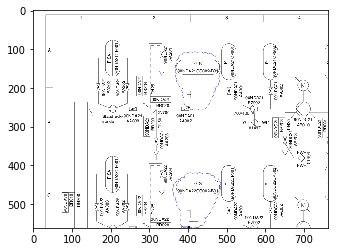

In [18]:
img = load_img_as_rgb('data/processed/classification_data_small/Fliesbilder/PDFsam_merge_0018_1x1.jpg')

after: (1124, 1522, 3)


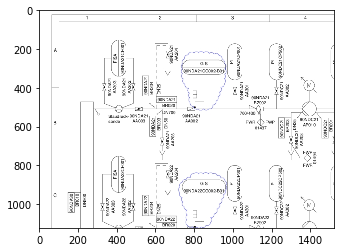

In [19]:
img = cv2.resize(img, (0, 0), fx=2, fy=2)
print('after: {}'.format(img.shape))
mp.imshow(img, cmap='gray')

In [29]:
w = 100
h = 100
dw = 30
dh = 30
ynum = np.ceil(1.25*(h/dh))
ystep = dh - np.ceil(((dh*ynum)-h)/(ynum-1))
print('step: {}, times: {}'.format(ystep, ynum))
30+17+17+17+17

step: 17.0, times: 5.0


98

In [30]:
def get_stride(img_size, patch_size):
    x_count = np.ceil(1.25*(img_size[0]/patch_size[0]))
    y_count = np.ceil(1.25*(img_size[1]/patch_size[1]))
    x_stride = patch_size[0] - np.ceil(((patch_size[0] * x_count)-img_size[0]) / (x_count-1))
    y_stride = patch_size[1] - np.ceil(((patch_size[1] * y_count)-img_size[1]) / (y_count-1))
    return int(x_stride), int(y_stride)

In [ ]:
get_stride((100, 120), (30, 30))

/home/simon/GitKraken/multiclass_keras/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


OverflowError: cannot convert float infinity to integer

1098